# Detecção de Fraudes em Cartões de Crédito

## Importar Bibliotecas

In [118]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix, accuracy_score

## Importar Dados

O dataset usado nesse projeto foi foi encontrado no Kaggle e criado por algumas empresas de cartões de crédito uropéias. O dataset apresenta transações que ocorreram em dois dias onde se pode encontrar 492 fraudes de 284.807 operações. O dataset contém apenas valores numéricos pois foi aplicado um PCA no original, que é um método que reduz a dimensionalidade do arquivo mantendo o máximo possível de informações.

In [8]:
file = "https://www.dropbox.com/s/b44o3t3ehmnx2b7/creditcard.csv?dl=1"
df = pd.read_csv(file)

Uma vez que os dados já estão em um dataframe, pode-se dar como concluída a etapa de coletar dados e então começar as análises.

## Análise Exploratória

In [9]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Podemos notar, que por conta da transformação PCA e por motivos de confidencialidade, as colunas perderam seus labels originais. Dessa forma, ficamos com os features Time, Amount, Class, V1, V2, ..., V28. Onde as colunas Time e Amount mantiveram seus valores originais e nossa coluna target é a Class

In [10]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [11]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Podemos observar também que nenhuma coluna apresenta Missing Values, o que facilita o processo, já que não conseguimos aplicar modelos de machine learning em valores faltantes. Porem, nesse dataset temos um problema muito comum também, principalmente quando lidamos com "Outliers", que é o desbalanceamento. Foi dito no Kaggle que epenas 492 operações são fraudulentas em um dataset de quase 285 mil operações.

[]

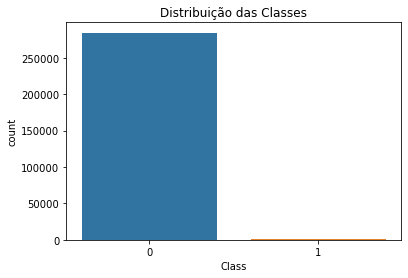

In [12]:
fig, ax = plt.subplots()
sns.countplot('Class', data=df, ax=ax)
ax.set_title('Distribuição das Classes')
plt.plot()

Com o plot acima conseguimos visualizar melhor o quão desbalanceado estão os dados. Em azul a quantidade de transações reais e em laranja a quantidade de transações fraudulentas

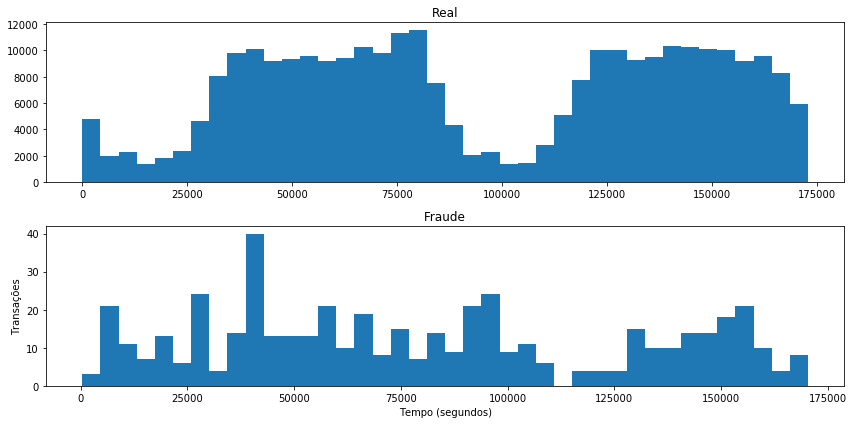

In [13]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12,6))

ax[0].hist(df.Time[df.Class == 0], bins=40)
ax[0].set_title('Real')

ax[1].hist(df.Time[df.Class == 1], bins=40)
ax[1].set_title('Fraude')

plt.xlabel('Tempo (segundos)')
plt.ylabel('Transações')
plt.tight_layout()

Aqui foi plotado as transações em função do tempo de cada uma, mas não se observa em primeira instância alguma informação que possa ser relevante para diferenciação entre fraudes e transações reais, além de claro, a quantidade de cada tipo

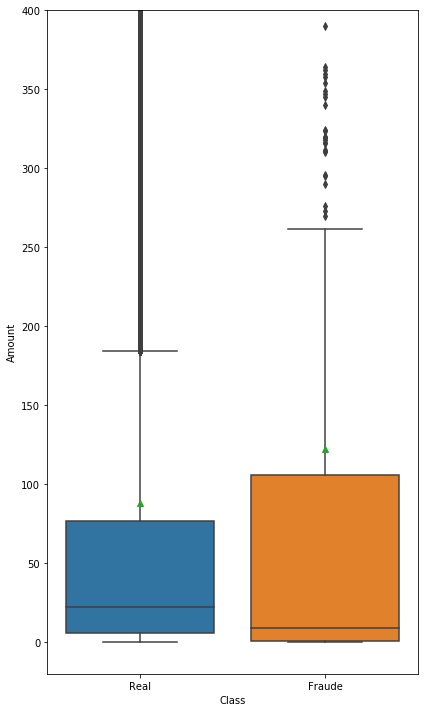

In [14]:
fig, ax = plt.subplots(figsize=(6,10), sharex=True)

sns.boxplot(df.Class, df.Amount, showmeans=True, ax=ax)
plt.ylim((-20, 400))
plt.xticks([0, 1], ['Real', 'Fraude'])

plt.tight_layout()

Seguindo a análise exploratória, plotei os boxplots para ver se há alguma diferença no padrão transações em relação à dimensão Amount e, pode se perceber uma distribuição diferente entre as duas classes, o que provavelmente será útil para o modelo de machine learning

## Preparar Dados

In [15]:
std = StandardScaler()
df_prep = df.copy()

df_prep["new_amount"] = std.fit_transform(df_prep["Amount"].values.reshape(-1,1))
df_prep["new_time"] = std.fit_transform(df_prep["Time"].values.reshape(-1,1))

df_prep.drop(["Time", "Amount"], axis = 1, inplace = True)

df_prep.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,new_amount,new_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964,-1.996583
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475,-1.996583
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686,-1.996562
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534,-1.996562
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403,-1.996541


Aqui, padronizei as colunas *Time e *Amount utilizando a biblioteca StandardScaler

## Balancear Dados

In [71]:
from sklearn.utils import resample

df_reais = df_prep[df_prep["Class"]==0]
df_fraudes = df_prep[df_prep["Class"]==1]

df_reais_downsampled = resample(df_reais, 
                                 replace=False,    # sample without replacement
                                 n_samples=600,     # to match minority class
                                 random_state=123) # reproducible results

# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_reais_downsampled, df_fraudes])
 
# Display new class counts
df_downsampled.Class.value_counts()

0    600
1    492
Name: Class, dtype: int64

Para balancear dados, existem algumas bibliotecas que simplificam o processo no Python, entretando, não consegui instalar a imblearn. Então o que fiz foi pegar 600 linhas aleatórias da classe marjoritária,que é a de transações reais, e criei um novo dataframe concatenando essas 600 linhas de transações reais mais as 492 de transações fraudulentas. 

In [72]:
df_downsampled

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,new_amount,new_time
143480,-1.337885,0.261692,2.646536,-1.973014,-0.933318,-1.123839,0.277759,-0.039386,1.111226,-1.609648,...,1.124621,-0.312253,0.968527,0.570910,-0.704900,0.253527,0.169347,0,-0.062808,-0.198657
163666,2.081591,-0.774080,-0.674991,-0.322871,-0.890005,-0.801469,-0.532596,-0.280944,-0.354142,0.799470,...,-0.310603,0.268725,0.020092,-0.359343,0.555034,-0.025385,-0.044868,0,-0.212137,0.449021
137005,-0.332971,1.188389,1.308248,0.052384,0.087272,-0.966515,0.750302,-0.108085,-0.488491,-0.528325,...,-0.638700,-0.029226,0.346024,-0.140051,0.070181,0.250678,0.099306,0,-0.349271,-0.270339
155649,-0.830622,1.222904,1.859594,-0.318554,0.272904,0.080357,0.385614,-0.167806,1.502836,-1.045793,...,-0.528849,-0.360037,-0.740677,0.367026,-0.700618,-0.323105,0.064605,0,-0.344753,0.235704
219246,1.964854,0.306862,-2.347355,1.144732,1.453977,-0.144400,0.871268,-0.209065,-0.308091,0.253584,...,1.461507,-0.126488,-0.910153,0.646694,-0.101542,0.000524,-0.089904,0,-0.349231,0.986272
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,-5.587794,...,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,1,1.206024,1.565196
280143,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,-3.232153,...,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,1,-0.350191,1.569513
280149,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,-3.463891,...,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,1,-0.041818,1.569597
281144,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,-5.245984,...,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,1,0.626302,1.582548


Assim ficou o novo DataFrame, com apenas 1092 transações

[]

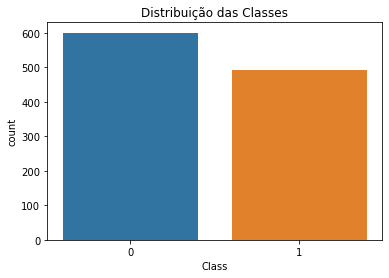

In [120]:
fig, ax = plt.subplots()
sns.countplot('Class', data=df_downsampled, ax=ax)
ax.set_title('Distribuição das Classes')
plt.plot()

O mesmo plot de antes, só que agora com o novo dataframe. Pode-se ver que os dados estão balanceados agora. 

## Dividir o dataset em treino e teste

In [73]:
df_downsampled.reset_index(drop = True)
X = df_downsampled.drop("Class", axis = 1)
y = df_downsampled["Class"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)

Utilizei a função *train_test_split para que não haja overfitting, dessa forma, dividi os dados em treino e teste para que o modelo seja propício para dados externos, sem ser os que ele foi treinado. 

## Aplicação do modelo de Machine Learning 

In [91]:
logistic = LogisticRegression()
gaussian = GaussianNB()
random_forest = RandomForestClassifier(n_estimators = 200)
decisiontree =  DecisionTreeClassifier()
svm = SVC()

modelos = [logistic, gaussian, random_forest, decisiontree, svm]

In [109]:
def score_model(modelo, X_t = X_train, X_ts = X_test, y_t = y_train, y_ts = y_test):
    modelo.fit(X_t, y_t)
    y_pred = modelo.predict(X_ts)
    return accuracy_score(y_test, y_pred)


In [110]:
for i in range (0, len(modelos)):
    scores = score_model(modelos[i])
    print(scores)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.


0.9573170731707317
0.9329268292682927
0.9512195121951219
0.9237804878048781
0.9359756097560976


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.


Aqui criei uma função para aplicar diversos modelos de Machine Learning e depois me retornar a acurácia de cada um, dessa forma eu poderia saber o que teve melhor resultado e continuar os procedimentos utilizando esse modelo

## Como se pode ver, o melhor modelo para esse caso é o Logistic Regression, pois retornou a melhor acurácia. Então usarei somente ele para fazer a matriz de confusão 

In [111]:
logistic = LogisticRegression()
logistic.fit(X_train,y_train)
y_hat = logistic.predict(X_test)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.


In [119]:
matriz = confusion_matrix(y_test, y_hat)
matriz

array([[164,   4],
       [ 10, 150]])

 A Matriz teve 4 False Negatives e 10 False Positives, ou seja, 4 transações foram caracterizadas como fraude quando na verdade não eram e 10 foram caracterizadas como transações reais quando na verdade eram fraudes

In [113]:
taxa_acerto = accuracy_score(y_test, y_hat)
taxa_acerto

0.9573170731707317

## Conclusões

Dos modelos utilizados para classificação, Random Forest, Naive Bayes, Logistic Regression, Decision Tree e o Suport Vector Classification, o melhor modelo foi o de Regressão Logistica, que retornou um ótimo resultado e se mostrou pronto   